# organize obs we have into separate dataframes for each tracer?

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
grid = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/LiveOcean/grid.nc')

## COLLIAS

In [6]:
# Initialize an empty list to store individual dataframes
dataframes = []
years = np.append(np.append(np.arange(1932,1943,1),np.arange(1949,1972+1)),[1974,1975])

# Loop through the range of years
for year in years:
    # Construct the file path
    file_path = f'/data/rbeutel/obs/collias/bottle/{year}.p'
    
    # Read the pickled dataframe
    df = pd.read_pickle(file_path)
    
    # Append the dataframe to the list
    dataframes.append(df)

# Concatenate all the dataframes in the list into a single dataframe
collias = pd.concat(dataframes, ignore_index=True)

collias

,cid,cruise,time,lat,lon,name,z,CT,SA,DO (uM),NO3 (uM),NO2 (uM),SiO4 (uM)
0,0,None,1932-07-15 18:15:00,48.616490,-122.762960,RSR837,-50,9.609088,30.918060,167.667782,NaN,0.52,42.014563
1,0,None,1932-07-15 18:15:00,48.616490,-122.762960,RSR837,-25,9.969579,30.576740,181.118742,NaN,0.44,42.014563
2,0,None,1932-07-15 18:15:00,48.616490,-122.762960,RSR837,-10,10.022918,30.496688,180.180303,NaN,0.44,42.014563
3,0,None,1932-07-15 18:15:00,48.616490,-122.762960,RSR837,-1,10.229211,30.265984,157.657765,NaN,0.41,37.991134
4,1,None,1932-07-26 09:20:00,48.616490,-122.762960,RSR837,-50,9.867721,30.496039,207.082223,NaN,0.22,48.993253
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93322,682,None,1975-09-24 12:06:00,47.719817,-122.637924,OCHC10,-2,14.392917,29.943874,288.413609,8.104286,0.58,67.009667
93323,682,None,1975-09-24 12:06:00,47.719817,-122.637924,OCHC10,0,14.453854,29.933897,293.731431,7.904286,0.60,67.009667
93324,683,None,1975-09-26 04:42:00,47.719817,-122.637924,OCHC10,-4,14.191010,29.953852,204.266906,36.320714,0.42,68.010183
93325,683,None,1975-09-26 04:42:00,47.719817,-122.637924,OCHC10,-2,14.221963,29.933826,215.840988,32.318571,0.40,68.010183


/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/shapefile.py:391: UserWarning: Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.
  warnings.warn('Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.')


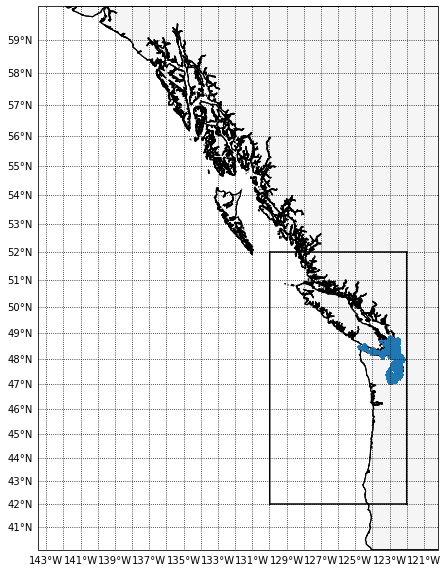

In [6]:
# Make plot area
xlim, ylim = [-143.5, -120.2], [40, 60]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', facecolor='whitesmoke', zorder=2))
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', zorder=4))

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs, zorder=8)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# Draw box
ax.plot(grid.lon_rho[:,0], grid.lat_rho[:,0], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[:,-1], grid.lat_rho[:,-1], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[-1,:], grid.lat_rho[-1,:], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[0,:], grid.lat_rho[0,:], 'k-', zorder=6, transform=crs.PlateCarree())

# add points  
ax.scatter(collias['lon'], collias['lat'], s=10, marker='*',transform=crs.PlateCarree(),zorder=7)

Text(0, 0.5, 'Monthly count')

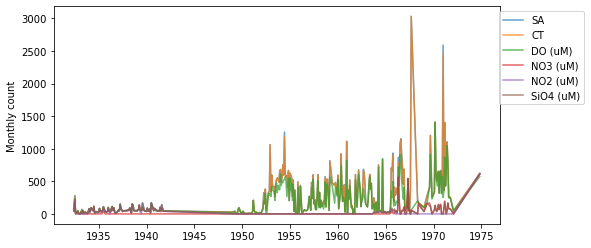

In [7]:
obs = collias

obs['year_month'] = obs['time'].dt.to_period('M')  # This creates a Period object 'YYYY-MM'
obs['year_month'] = obs['year_month'].dt.to_timestamp()

# Columns to count non-NaN entries
columns_to_count = ['SA', 'CT', 'DO (uM)', 'NO3 (uM)', 'NO2 (uM)', 'SiO4 (uM)']

# Group by 'year_month' and count non-NaN entries for each column
monthly_counts = obs.groupby('year_month')[columns_to_count].count()

# plot
fig, ax = plt.subplots(1,1,figsize=[8,4])

for var in monthly_counts.columns[:]:
    ax.plot(monthly_counts.index, monthly_counts[var], label=var,alpha=0.7)

# ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.2, 1.0))
ax.set_ylabel('Monthly count')

# DFO bottle

In [55]:
# Initialize an empty list to store individual dataframes
dataframes = []
years = np.append(np.arange(1930,1934+1,1), np.append(np.append(np.arange(1936,1939+1,1),np.arange(1949,1952+1,1)),np.arange(1954,2021+1,1)))

# Loop through the range of years
for year in years:
    # Construct the file path
    file_path = f'/data/rbeutel/obs/dfo1/bottle/{year}.p'
    
    # Read the pickled dataframe
    df = pd.read_pickle(file_path)
    
    # Append the dataframe to the list
    dataframes.append(df)

# Concatenate all the dataframes in the list into a single dataframe
dfob = pd.concat(dataframes, ignore_index=True)

dfob

,cid,lon,lat,time,z,SA,CT,DO (uM),NO3 (uM),Chl (mg m-3),name,cruise
0,0.0,-123.544998,48.548332,1930-12-30 03:45:00,-1.000000,28.169619,NaN,412.632385,NaN,NaN,None,None
1,0.0,-123.544998,48.548332,1930-12-30 03:45:00,-2.000000,28.933902,NaN,362.169769,NaN,NaN,None,None
2,0.0,-123.544998,48.548332,1930-12-30 03:45:00,-4.000000,29.064554,NaN,346.986328,NaN,NaN,None,None
3,0.0,-123.544998,48.548332,1930-12-30 03:45:00,-6.000000,30.170723,NaN,278.660828,NaN,NaN,None,None
4,0.0,-123.544998,48.548332,1930-12-30 03:45:00,-9.000000,30.603026,NaN,236.236511,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
355686,124.0,-123.181114,48.856083,2021-03-11 19:09:00,-1.300000,27.815056,7.823215,280.447113,25.170000,NaN,None,None
355687,124.0,-123.181114,48.856083,2021-03-11 19:09:00,-165.600006,30.514099,7.694259,237.576233,28.370001,NaN,None,None
355688,125.0,-123.023354,48.775066,2021-03-11 20:28:00,-2.700000,NaN,NaN,240.255676,27.920000,NaN,None,None
355689,126.0,-123.250267,48.616665,2021-03-11 22:31:00,-1.400000,NaN,NaN,237.576233,26.910000,NaN,None,None


In [57]:
np.max(dfob['DO (uM)'])

19564.314453125

/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


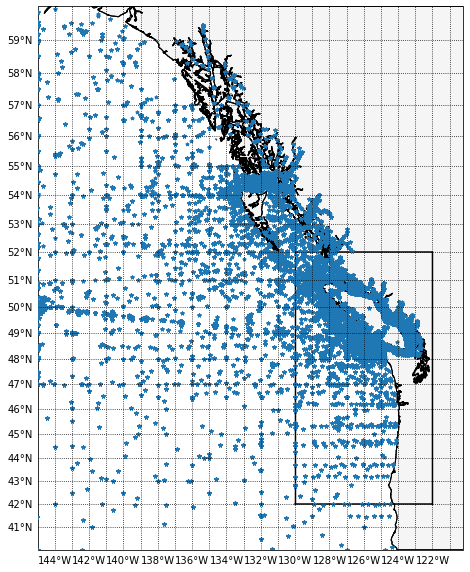

In [14]:
# Make plot area
xlim, ylim = [-145, -120.2], [40, 60]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', facecolor='whitesmoke', zorder=2))
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', zorder=4))

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs, zorder=8)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# Draw box
ax.plot(grid.lon_rho[:,0], grid.lat_rho[:,0], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[:,-1], grid.lat_rho[:,-1], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[-1,:], grid.lat_rho[-1,:], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[0,:], grid.lat_rho[0,:], 'k-', zorder=6, transform=crs.PlateCarree())

# add points  
ax.scatter(dfob['lon'], dfob['lat'], s=10, marker='*',transform=crs.PlateCarree(),zorder=7)

Text(0, 0.5, 'Monthly count')

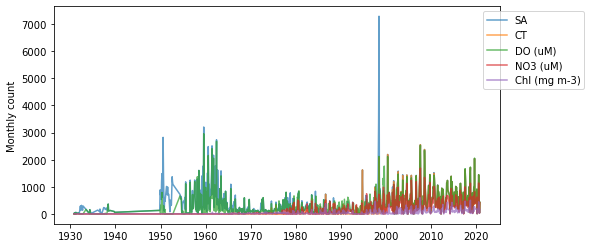

In [10]:
obs = dfob

obs['year_month'] = obs['time'].dt.to_period('M')  # This creates a Period object 'YYYY-MM'
obs['year_month'] = obs['year_month'].dt.to_timestamp()

# Columns to count non-NaN entries
columns_to_count = ['SA', 'CT', 'DO (uM)', 'NO3 (uM)', 'Chl (mg m-3)']

# Group by 'year_month' and count non-NaN entries for each column
monthly_counts = obs.groupby('year_month')[columns_to_count].count()

# plot
fig, ax = plt.subplots(1,1,figsize=[8,4])

for var in monthly_counts.columns[:]:
    ax.plot(monthly_counts.index, monthly_counts[var], label=var,alpha=0.7)

# ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.2, 1.0))
ax.set_ylabel('Monthly count')

## DFO CTD

In [15]:
# Initialize an empty list to store individual dataframes
dataframes = []
years = np.arange(1965,2021+1,1)

# Loop through the range of years
for year in years:
    # Construct the file path
    file_path = f'/data/rbeutel/obs/dfo1/ctd/{year}.p'
    
    # Read the pickled dataframe
    df = pd.read_pickle(file_path)
    
    # Append the dataframe to the list
    dataframes.append(df)

# Concatenate all the dataframes in the list into a single dataframe
dfoc = pd.concat(dataframes, ignore_index=True)

dfoc

,cid,lon,lat,time,z,SA,CT,DO (uM),name,cruise
0,0.0,-123.099998,48.919998,1965-07-05 21:50:00,-3.000000,23.513263,NaN,NaN,None,None
1,0.0,-123.099998,48.919998,1965-07-05 21:50:00,-5.000000,24.277516,NaN,NaN,None,None
2,0.0,-123.099998,48.919998,1965-07-05 21:50:00,-10.000000,29.416382,NaN,NaN,None,None
3,0.0,-123.099998,48.919998,1965-07-05 21:50:00,-15.000000,29.335885,NaN,NaN,None,None
4,0.0,-123.099998,48.919998,1965-07-05 21:50:00,-20.000000,29.667710,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...
32265547,275.0,-123.939056,49.310513,2021-02-03 16:37:06,-395.200012,31.417459,9.322629,NaN,None,None
32265548,275.0,-123.939056,49.310513,2021-02-03 16:37:06,-396.200012,31.417479,9.322717,NaN,None,None
32265549,275.0,-123.939056,49.310513,2021-02-03 16:37:06,-397.100006,31.417095,9.322925,NaN,None,None
32265550,275.0,-123.939056,49.310513,2021-02-03 16:37:06,-398.100006,31.416412,9.324027,NaN,None,None


/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


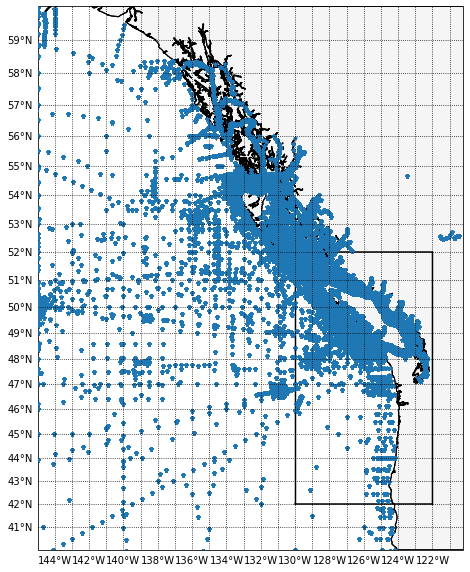

In [16]:
# Make plot area
xlim, ylim = [-145, -120.2], [40, 60]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', facecolor='whitesmoke', zorder=2))
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', zorder=4))

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs, zorder=8)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# Draw box
ax.plot(grid.lon_rho[:,0], grid.lat_rho[:,0], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[:,-1], grid.lat_rho[:,-1], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[-1,:], grid.lat_rho[-1,:], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[0,:], grid.lat_rho[0,:], 'k-', zorder=6, transform=crs.PlateCarree())

# add points  
ax.scatter(dfoc['lon'], dfoc['lat'], s=10, marker='*',transform=crs.PlateCarree(),zorder=7)

Text(0, 0.5, 'Monthly count')

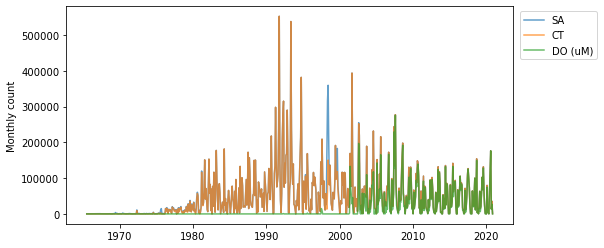

In [13]:
obs = dfoc

obs['year_month'] = obs['time'].dt.to_period('M')  # This creates a Period object 'YYYY-MM'
obs['year_month'] = obs['year_month'].dt.to_timestamp()

# Columns to count non-NaN entries
columns_to_count = ['SA', 'CT', 'DO (uM)']

# Group by 'year_month' and count non-NaN entries for each column
monthly_counts = obs.groupby('year_month')[columns_to_count].count()

# plot
fig, ax = plt.subplots(1,1,figsize=[8,4])

for var in monthly_counts.columns[:]:
    ax.plot(monthly_counts.index, monthly_counts[var], label=var,alpha=0.7)

# ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.2, 1.0))
ax.set_ylabel('Monthly count')

## Ecology bottle

In [17]:
# Initialize an empty list to store individual dataframes
dataframes = []
years = np.arange(1999,2023+1,1)

# Loop through the range of years
for year in years:
    # Construct the file path
    file_path = f'/data/rbeutel/obs/ecology_nc/bottle/{year}.p'
    
    # Read the pickled dataframe
    df = pd.read_pickle(file_path)
    
    # Append the dataframe to the list
    dataframes.append(df)

# Concatenate all the dataframes in the list into a single dataframe
ecob = pd.concat(dataframes, ignore_index=True)

ecob

,cid,cruise,time,lat,lon,name,z,CT,SA,DO (uM),Chl (mg m-3),NO3 (uM),NH4 (uM),PO4 (uM),SiO4 (uM)
0,0.0,None,1999-02-20 22:13:20,47.051670,-122.904999,BUD002,-1.5,8.324457,24.135560,290.753113,NaN,35.119999,1.40,1.27,163.320007
1,1.0,None,1999-02-20 21:48:48,47.091671,-122.916702,BUD005,-1.5,8.189600,24.164813,306.509369,NaN,32.290001,1.89,2.04,95.099998
2,2.0,None,1999-02-20 18:32:32,47.290001,-122.448303,CMB003,-1.5,8.651748,27.743276,279.171875,NaN,29.469999,3.38,1.79,100.099998
3,3.0,None,1999-02-20 19:26:56,47.276669,-122.708298,CRR001,-1.5,8.293665,27.872162,295.549988,NaN,27.920000,0.28,2.41,73.709999
4,4.0,None,1999-02-20 17:01:52,47.264999,-122.843300,CSE001,-1.5,8.198812,26.587387,306.543732,NaN,27.770000,0.38,2.40,79.470001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21232,207.0,None,2023-08-22 17:14:40,47.667000,-122.820000,HCB010,-99.5,10.227714,30.582383,NaN,0.2871,28.350000,1.13,2.98,50.860001
21233,208.0,None,2023-09-01 17:16:48,47.091671,-122.916702,BUD005,-10.5,15.710166,29.896395,220.774994,17.8470,1.530000,0.75,2.01,41.230000
21234,208.0,None,2023-09-01 17:16:48,47.091671,-122.916702,BUD005,-14.5,15.666502,29.906749,211.481247,21.0002,2.120000,0.92,2.14,41.619999
21235,209.0,None,2023-09-01 18:57:04,47.264999,-122.843300,CSE001,-47.0,14.345714,30.161800,217.528122,1.0290,12.110000,4.76,2.31,36.150002


/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


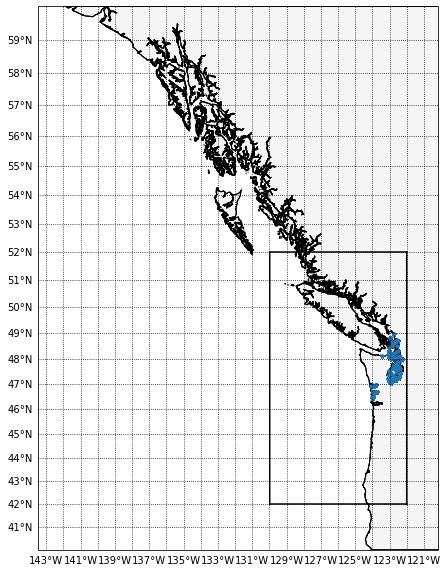

In [16]:
# Make plot area
xlim, ylim = [-143.5, -120.2], [40, 60]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', facecolor='whitesmoke', zorder=2))
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', zorder=4))

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs, zorder=8)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# Draw box
ax.plot(grid.lon_rho[:,0], grid.lat_rho[:,0], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[:,-1], grid.lat_rho[:,-1], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[-1,:], grid.lat_rho[-1,:], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[0,:], grid.lat_rho[0,:], 'k-', zorder=6, transform=crs.PlateCarree())

# add points  
ax.scatter(ecob['lon'], ecob['lat'], s=10, marker='*',transform=crs.PlateCarree(),zorder=7)

In [19]:
ecob.columns

Index(['cid', 'cruise', 'time', 'lat', 'lon', 'name', 'z', 'CT', 'SA',
       'DO (uM)', 'Chl (mg m-3)', 'NO3 (uM)', 'NH4 (uM)', 'PO4 (uM)',
       'SiO4 (uM)', 'year_month'],
      dtype='object')

Text(0, 0.5, 'Monthly count')

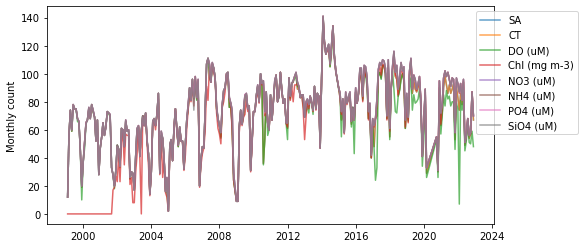

In [20]:
obs = ecob

obs['year_month'] = obs['time'].dt.to_period('M')  # This creates a Period object 'YYYY-MM'
obs['year_month'] = obs['year_month'].dt.to_timestamp()

# Columns to count non-NaN entries
columns_to_count = ['SA', 'CT', 'DO (uM)','Chl (mg m-3)', 'NO3 (uM)', 'NH4 (uM)', 'PO4 (uM)', 'SiO4 (uM)']

# Group by 'year_month' and count non-NaN entries for each column
monthly_counts = obs.groupby('year_month')[columns_to_count].count()

# plot
fig, ax = plt.subplots(1,1,figsize=[8,4])

for var in monthly_counts.columns[:]:
    ax.plot(monthly_counts.index, monthly_counts[var], label=var,alpha=0.7)

# ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.2, 1.0))
ax.set_ylabel('Monthly count')

## Ecology CTD

In [18]:
# Initialize an empty list to store individual dataframes
dataframes = []
years = np.arange(1999,2023+1,1)

# Loop through the range of years
for year in years:
    # Construct the file path
    file_path = f'/data/rbeutel/obs/ecology_nc/ctd/{year}.p'
    
    # Read the pickled dataframe
    df = pd.read_pickle(file_path)
    
    # Append the dataframe to the list
    dataframes.append(df)

# Concatenate all the dataframes in the list into a single dataframe
ecoc = pd.concat(dataframes, ignore_index=True)

ecoc

,cid,cruise,time,lat,lon,name,z,CT,SA,DO (uM),Chl (mg m-3)
0,0.0,None,1999-01-05 17:50:56,48.029999,-122.616699,ADM001,-0.5,8.718180,28.953279,245.546875,NaN
1,0.0,None,1999-01-05 17:50:56,48.029999,-122.616699,ADM001,-1.0,8.718016,28.960696,246.815628,NaN
2,0.0,None,1999-01-05 17:50:56,48.029999,-122.616699,ADM001,-1.5,8.714305,28.975850,248.096863,NaN
3,0.0,None,1999-01-05 17:50:56,48.029999,-122.616699,ADM001,-2.0,8.707431,29.012808,247.787506,NaN
4,0.0,None,1999-01-05 17:50:56,48.029999,-122.616699,ADM001,-2.5,8.702106,29.040924,245.687500,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1218644,296.0,None,2023-12-11 19:39:44,46.644001,-123.992996,WPA113,-7.5,10.721865,25.840675,305.443756,1.0871
1218645,296.0,None,2023-12-11 19:39:44,46.644001,-123.992996,WPA113,-8.0,10.724160,25.856543,305.462524,1.0968
1218646,296.0,None,2023-12-11 19:39:44,46.644001,-123.992996,WPA113,-8.5,10.725697,25.869495,305.321869,1.0645
1218647,296.0,None,2023-12-11 19:39:44,46.644001,-123.992996,WPA113,-9.0,10.725898,25.872201,NaN,1.0919


/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


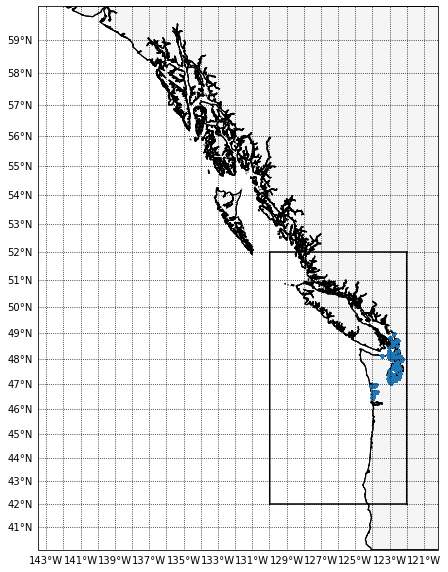

In [22]:
# Make plot area
xlim, ylim = [-143.5, -120.2], [40, 60]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', facecolor='whitesmoke', zorder=2))
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', zorder=4))

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs, zorder=8)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# Draw box
ax.plot(grid.lon_rho[:,0], grid.lat_rho[:,0], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[:,-1], grid.lat_rho[:,-1], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[-1,:], grid.lat_rho[-1,:], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[0,:], grid.lat_rho[0,:], 'k-', zorder=6, transform=crs.PlateCarree())

# add points  
ax.scatter(ecoc['lon'], ecoc['lat'], s=10, marker='*',transform=crs.PlateCarree(),zorder=7)

Text(0, 0.5, 'Monthly count')

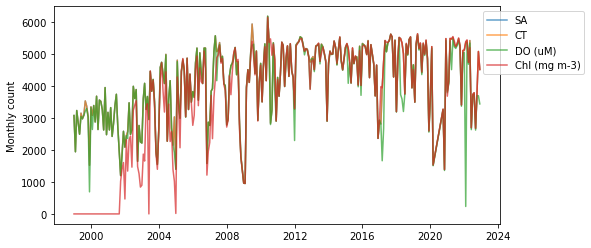

In [24]:
obs = ecoc

obs['year_month'] = obs['time'].dt.to_period('M')  # This creates a Period object 'YYYY-MM'
obs['year_month'] = obs['year_month'].dt.to_timestamp()

# Columns to count non-NaN entries
columns_to_count = ['SA', 'CT', 'DO (uM)','Chl (mg m-3)']

# Group by 'year_month' and count non-NaN entries for each column
monthly_counts = obs.groupby('year_month')[columns_to_count].count()

# plot
fig, ax = plt.subplots(1,1,figsize=[8,4])

for var in monthly_counts.columns[:]:
    ax.plot(monthly_counts.index, monthly_counts[var], label=var,alpha=0.7)

# ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.2, 1.0))
ax.set_ylabel('Monthly count')

## Line P

In [20]:
# Initialize an empty list to store individual dataframes
dataframes = []
years = [1990,1992,1993,1994,1996,1997,1999,2001,2002,2003,2004,2005,2008,2010,2013,2014,2015,2016,2017,2018,2019]

# Loop through the range of years
for year in years:
    # Construct the file path
    file_path = f'/data/rbeutel/obs/LineP/bottle/{year}.p'
    
    # Read the pickled dataframe
    df = pd.read_pickle(file_path)
    
    # Append the dataframe to the list
    dataframes.append(df)

# Concatenate all the dataframes in the list into a single dataframe
lpb = pd.concat(dataframes, ignore_index=True)

lpb

,cid,cruise,time,lat,lon,name,z,CT,SA,DO (uM),NO3 (uM),PO4 (uM),TA (uM),DIC (uM)
0,0.0,1990.01,1990-05-10 21:14:00,48.65,-126.67,4,0.000000,10.454454,31.704441,307.362486,0.000000,0.297018,NaN,1959.807121
1,0.0,1990.01,1990-05-10 21:14:00,48.65,-126.67,4,-10.000000,10.453312,31.704290,NaN,0.000000,0.215092,NaN,1959.177549
2,0.0,1990.01,1990-05-10 21:14:00,48.65,-126.67,4,-20.000000,10.391754,31.713305,310.467975,0.000000,0.225348,NaN,1959.297735
3,0.0,1990.01,1990-05-10 21:14:00,48.65,-126.67,4,-30.000000,8.499389,32.585343,300.011319,13.739411,1.281661,NaN,2097.618445
4,0.0,1990.01,1990-05-10 21:14:00,48.65,-126.67,4,-50.000000,8.053564,32.761290,267.585230,11.486986,1.128186,NaN,2092.272399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,3.0,2019.06,2019-06-05 18:07:00,48.97,-130.67,12,-2465.214278,1.584489,34.814633,83.447737,42.607188,3.024071,2514.343711,2466.748364
1443,3.0,2019.06,2019-06-05 18:07:00,48.97,-130.67,12,-2953.941376,1.434161,34.835159,101.749890,41.762237,2.936895,2523.959653,2462.097386
1444,3.0,2019.06,2019-06-05 18:07:00,48.97,-130.67,12,-2954.136920,1.434141,34.835159,101.749976,41.658127,2.936898,2525.836414,2461.682898
1445,3.0,2019.06,2019-06-05 18:07:00,48.97,-130.67,12,-3221.770899,1.424075,34.836498,103.223359,41.706408,2.919449,2525.427258,2457.445813


In [65]:
# how many of these rows overlaps with DFO bottle data?
k = 0
for i in range(len(lpb)):
    k += len(dfob[(dfob.lon == lpb.lon[i]) & (dfob.lat==lpb.lat[i]) & (dfob.z==lpb.z[i]) & (dfob.time == lpb.time[i])])
k

29

/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


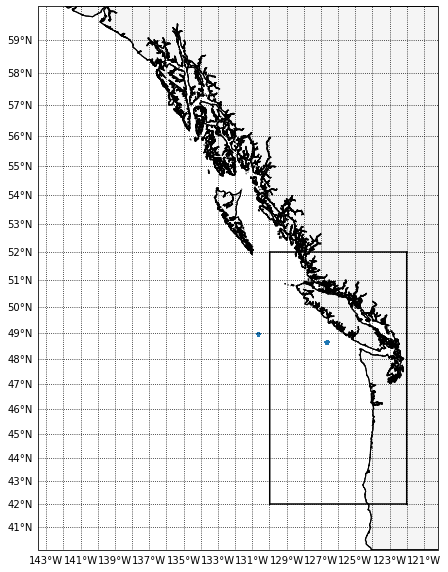

In [26]:
# Make plot area
xlim, ylim = [-143.5, -120.2], [40, 60]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', facecolor='whitesmoke', zorder=2))
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', zorder=4))

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs, zorder=8)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# Draw box
ax.plot(grid.lon_rho[:,0], grid.lat_rho[:,0], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[:,-1], grid.lat_rho[:,-1], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[-1,:], grid.lat_rho[-1,:], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[0,:], grid.lat_rho[0,:], 'k-', zorder=6, transform=crs.PlateCarree())

# add points  
ax.scatter(lpb['lon'], lpb['lat'], s=10, marker='*',transform=crs.PlateCarree(),zorder=7)

Text(0, 0.5, 'Monthly count')

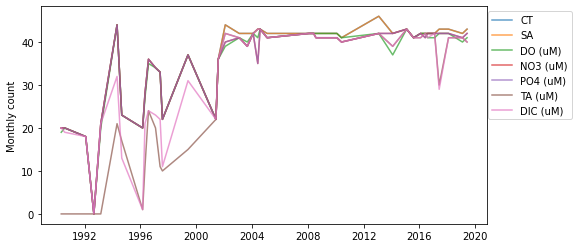

In [32]:
obs = lpb

obs['year_month'] = pd.to_datetime(obs.time).dt.to_period('M')  # This creates a Period object 'YYYY-MM'
obs['year_month'] = obs['year_month'].dt.to_timestamp()

# Columns to count non-NaN entries
columns_to_count = obs.columns.drop(['cid', 'cruise', 'time', 'lat', 'lon', 'name', 'z', 'year_month'])

# Group by 'year_month' and count non-NaN entries for each column
monthly_counts = obs.groupby('year_month')[columns_to_count].count()

# plot
fig, ax = plt.subplots(1,1,figsize=[8,4])

for var in monthly_counts.columns[:]:
    ax.plot(monthly_counts.index, monthly_counts[var], label=var,alpha=0.7)

# ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.2, 1.0))
ax.set_ylabel('Monthly count')

## Line P CTD

In [45]:
# Initialize an empty list to store individual dataframes
dataframes = []
years = np.arange(1993,2023+1,1)

# Loop through the range of years
for year in years:
    # Construct the file path
    file_path = f'/data/rbeutel/obs/LineP/ctd/{year}.p'
    
    # Read the pickled dataframe
    df = pd.read_pickle(file_path)
    
    # Append the dataframe to the list
    dataframes.append(df)

# Concatenate all the dataframes in the list into a single dataframe
lpc = pd.concat(dataframes, ignore_index=True)

lpc

,cid,cruise,time,lat,lon,name,z,CT,SA,DO (uM)
0,0.0,"Line P, WOCE, JGOFS",1993-03-07 13:15:00,48.571833,-125.518833,P1,-1.289021,8.534735,32.218262,NaN
1,0.0,"Line P, WOCE, JGOFS",1993-03-07 13:15:00,48.571833,-125.518833,P1,-1.983106,8.533807,32.221758,NaN
2,0.0,"Line P, WOCE, JGOFS",1993-03-07 13:15:00,48.571833,-125.518833,P1,-2.974652,8.531972,32.229866,NaN
3,0.0,"Line P, WOCE, JGOFS",1993-03-07 13:15:00,48.571833,-125.518833,P1,-3.867039,8.530186,32.235567,NaN
4,0.0,"Line P, WOCE, JGOFS",1993-03-07 13:15:00,48.571833,-125.518833,P1,-4.957730,8.527289,32.234227,NaN
...,...,...,...,...,...,...,...,...,...,...
1955153,14.0,Line P,2023-04-05 18:44:00,48.970330,-130.668330,P12,-593.161833,4.235858,34.335016,21112.387196
1955154,14.0,Line P,2023-04-05 18:44:00,48.970330,-130.668330,P12,-593.952762,4.235695,34.335029,21009.475431
1955155,14.0,Line P,2023-04-05 18:44:00,48.970330,-130.668330,P12,-595.238016,4.235186,34.335754,20803.633400
1955156,14.0,Line P,2023-04-05 18:44:00,48.970330,-130.668330,P12,-596.028937,4.234924,34.335768,20906.697046


In [52]:
set(lpc.name) #not all stations included for whatever reason, add the rest

{'P1',
 'P1/B8',
 'P10',
 'P11',
 'P12',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9',
 'PRE-P4'}

/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


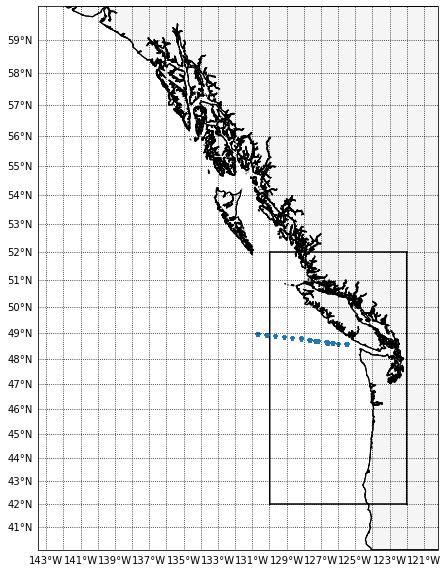

In [50]:
# Make plot area
xlim, ylim = [-143.5, -120.2], [40, 60]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', facecolor='whitesmoke', zorder=2))
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', zorder=4))

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs, zorder=8)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# Draw box
ax.plot(grid.lon_rho[:,0], grid.lat_rho[:,0], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[:,-1], grid.lat_rho[:,-1], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[-1,:], grid.lat_rho[-1,:], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[0,:], grid.lat_rho[0,:], 'k-', zorder=6, transform=crs.PlateCarree())

# add points  
ax.scatter(lpc['lon'], lpc['lat'], s=10, marker='*',transform=crs.PlateCarree(),zorder=7)

Text(0, 0.5, 'Monthly count')

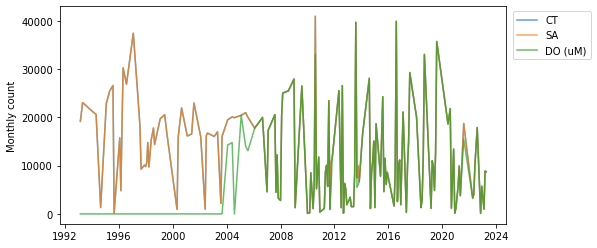

In [34]:
obs = lpc

obs['year_month'] = pd.to_datetime(obs.time).dt.to_period('M')  # This creates a Period object 'YYYY-MM'
obs['year_month'] = obs['year_month'].dt.to_timestamp()

# Columns to count non-NaN entries
columns_to_count = obs.columns.drop(['cid', 'cruise', 'time', 'lat', 'lon', 'name', 'z', 'year_month'])

# Group by 'year_month' and count non-NaN entries for each column
monthly_counts = obs.groupby('year_month')[columns_to_count].count()

# plot
fig, ax = plt.subplots(1,1,figsize=[8,4])

for var in monthly_counts.columns[:]:
    ax.plot(monthly_counts.index, monthly_counts[var], label=var,alpha=0.7)

# ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.2, 1.0))
ax.set_ylabel('Monthly count')

## NCEI Coastal 

In [54]:
cncei = pd.read_csv('/data/rbeutel/obs/nceiCoastal/bottle/CODAP_NA_v2021.csv').drop(0)#, ignore_index=True)

# replace all -999 values with np.nan
# cncei.replace(-999.0,np.nan, inplace=True)
cncei.replace(-999,np.nan, inplace=True)
cncei.replace('-999',np.nan, inplace=True)



cncei 

<ipython-input-54-615fbbb50f85>:1: DtypeWarning: Columns (0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  cncei = pd.read_csv('/data/rbeutel/obs/nceiCoastal/bottle/CODAP_NA_v2021.csv').drop(0)#, ignore_index=True)


,Accession,EXPOCODE,Cruise_flag,Cruise_ID,Observation_type,Profile_number,Station_ID,Cast_number,Niskin_ID,Niskin_flag,...,Nitrate,Nitrate_flag,Nitrite,Nitrite_flag,Nitrate_and_Nitrite,Nitrate_and_Nitrite_flag,recommended_Nitrate_and_Nitrite,recommended_Nitrate_and_Nitrite_flag,Ammonium,Ammonium_flag
1,144549,33HQ20080329,B,HLY0802,Niskin,1,1,5,1,2,...,25.8,2,0.19,2,25.99,2,25.99,2,0.14,2
2,144549,33HQ20080329,B,HLY0802,Niskin,1,1,5,2,2,...,25.6,2,0.2,2,25.8,2,25.8,2,0.13,2
3,144549,33HQ20080329,B,HLY0802,Niskin,1,1,5,3,2,...,24,2,0.15,2,24.15,2,24.15,2,0.41,2
4,144549,33HQ20080329,B,HLY0802,Niskin,1,1,5,4,2,...,22.6,2,0.17,2,22.77,2,22.77,2,NaN,9
5,144549,33HQ20080329,B,HLY0802,Niskin,1,1,5,5,2,...,21.5,2,0.16,2,21.66,2,21.66,2,0.15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28202,208230,3.3222E+11,A,SH1709,Niskin,3391,HB07,1,7,2,...,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9
28203,208230,3.3222E+11,A,SH1709,Niskin,3391,HB07,1,8,2,...,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9
28204,208230,3.3222E+11,A,SH1709,Niskin,3391,HB07,1,9,2,...,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9
28205,208230,3.3222E+11,A,SH1709,Niskin,3391,HB07,1,10,2,...,NaN,9,NaN,9,NaN,9,NaN,9,NaN,9


/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/shapefile.py:391: UserWarning: Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.
  warnings.warn('Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.')


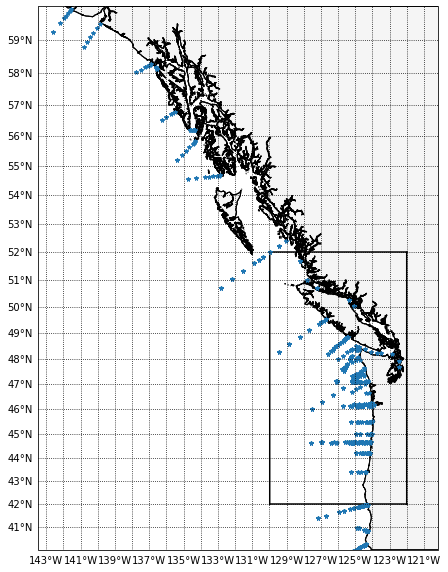

In [16]:
# Make plot area
xlim, ylim = [-143.5, -120.2], [40, 60]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', facecolor='whitesmoke', zorder=2))
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', zorder=4))

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs, zorder=8)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# Draw box
ax.plot(grid.lon_rho[:,0], grid.lat_rho[:,0], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[:,-1], grid.lat_rho[:,-1], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[-1,:], grid.lat_rho[-1,:], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[0,:], grid.lat_rho[0,:], 'k-', zorder=6, transform=crs.PlateCarree())

# add points  
ax.scatter(pd.to_numeric(cncei.Longitude), pd.to_numeric(cncei.Latitude), s=10, marker='*',transform=crs.PlateCarree(),zorder=7)

Text(0, 0.5, 'Monthly count')

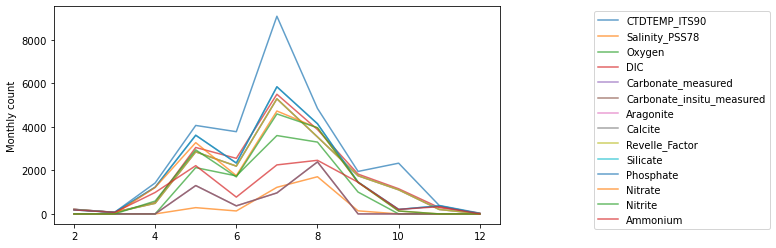

In [41]:
obs = cncei

# obs['year_month'] = pd.to_datetime(obs.time).dt.to_period('M')  # This creates a Period object 'YYYY-MM'
obs['year_month'] = pd.to_numeric(obs['Month_UTC'])

# Columns to count non-NaN entries
columns_to_count = ['CTDTEMP_ITS90','Salinity_PSS78', 'Oxygen', 'DIC', 'Carbonate_measured', 'Carbonate_insitu_measured',
      'Aragonite', 'Calcite', 'Revelle_Factor', 'Silicate', 'Phosphate', 'Nitrate', 'Nitrite','Ammonium']

# Group by 'year_month' and count non-NaN entries for each column
monthly_counts = obs.groupby('year_month')[columns_to_count].count()

# plot
fig, ax = plt.subplots(1,1,figsize=[8,4])

for var in monthly_counts.columns[:]:
    ax.plot(monthly_counts.index, monthly_counts[var], label=var,alpha=0.7)

# ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.2, 1.0))
ax.set_ylabel('Monthly count')

## NCEI PWN

In [77]:
# Initialize an empty list to store individual dataframes
dataframes = []
years = [1985,1986,1989] + list(np.arange(1991,2008+1,1)) + [2010,2013,2014,2015,2016,2017]

# Loop through the range of years
for year in years:
    # Construct the file path
    file_path = f'/data/rbeutel/obs/nceiPNW/bottle/{year}.p'
    
    # Read the pickled dataframe
    df = pd.read_pickle(file_path)
    
    # Append the dataframe to the list
    dataframes.append(df)

# Concatenate all the dataframes in the list into a single dataframe
pncei = pd.concat(dataframes, ignore_index=True)

pncei 

,cid,cruise,time,lat,lon,name,z,CT,SA,DO (uM),NO3 (uM),PO4 (uM),TA (uM),DIC (uM)
0,0.0,PR06,1985-10-29 22:47:00,48.6500,-126.67000,1.0,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,PR06,1985-10-29 22:47:00,48.6500,-126.67000,1.0,-10.014418,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,PR06,1985-10-29 22:47:00,48.6500,-126.67000,1.0,-20.028345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,PR06,1985-10-29 22:47:00,48.6500,-126.67000,1.0,-30.041782,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,PR06,1985-10-29 22:47:00,48.6500,-126.67000,1.0,-51.058487,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,3.0,LINE_P,2017-02-19 11:31:00,48.2985,-124.00083,JF2,-74.256055,7.835275,31.724525,237.790628,23.635569,1.937174,2187.058806,2115.209138
1954,3.0,LINE_P,2017-02-19 11:31:00,48.2985,-124.00083,JF2,-99.927107,7.962665,31.972289,228.221254,23.037428,1.872111,2214.340810,2127.296855
1955,3.0,LINE_P,2017-02-19 11:31:00,48.2985,-124.00083,JF2,-124.504865,8.137256,32.293177,211.271558,23.444989,1.904521,2222.453716,2145.534459
1956,3.0,LINE_P,2017-02-19 11:31:00,48.2985,-124.00083,JF2,-149.376930,8.282000,32.563459,201.793148,22.846636,1.848659,2233.266410,2158.478812


In [87]:
# ok so this is DFO data.. how much overlaps with the DFO dataset?
k = 0
for i in range(len(pncei)):
    k += len(dfob[(dfob.lon == pncei.lon[i]) & (dfob.lat==pncei.lat[i])& (dfob.z==np.round(pncei.z[i],1))])
k

1285

In [88]:
k = 0
for i in range(len(pncei)):
    k += len(lpb[(lpb.lon == pncei.lon[i]) & (lpb.lat==pncei.lat[i])& (lpb.z==np.round(pncei.z[i],1))])
k

37

/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


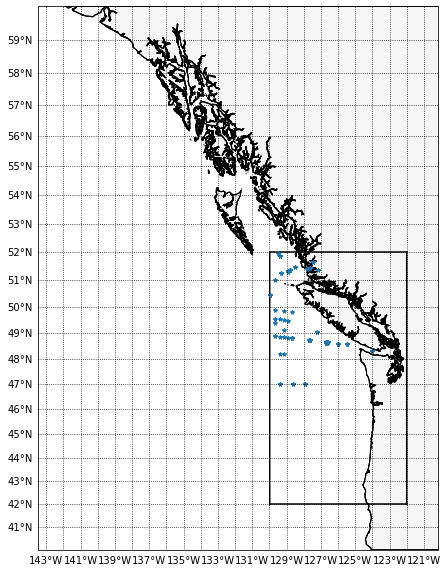

In [54]:
# Make plot area
xlim, ylim = [-143.5, -120.2], [40, 60]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', facecolor='whitesmoke', zorder=2))
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', zorder=4))

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs, zorder=8)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# Draw box
ax.plot(grid.lon_rho[:,0], grid.lat_rho[:,0], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[:,-1], grid.lat_rho[:,-1], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[-1,:], grid.lat_rho[-1,:], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[0,:], grid.lat_rho[0,:], 'k-', zorder=6, transform=crs.PlateCarree())

# add points  
ax.scatter(pncei['lon'], pncei['lat'], s=10, marker='*',transform=crs.PlateCarree(),zorder=7)

Text(0, 0.5, 'Monthly count')

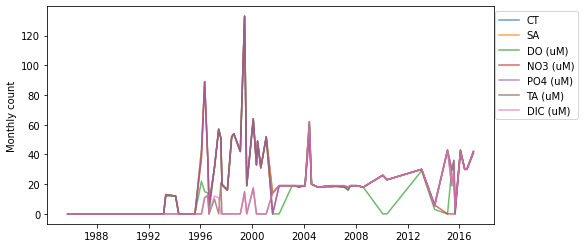

In [55]:
obs = pncei

obs['year_month'] = pd.to_datetime(obs.time).dt.to_period('M')  # This creates a Period object 'YYYY-MM'
obs['year_month'] = obs['year_month'].dt.to_timestamp()

# Columns to count non-NaN entries
columns_to_count = obs.columns.drop(['cid', 'cruise', 'time', 'lat', 'lon', 'name', 'z', 'year_month'])

# Group by 'year_month' and count non-NaN entries for each column
monthly_counts = obs.groupby('year_month')[columns_to_count].count()

# plot
fig, ax = plt.subplots(1,1,figsize=[8,4])

for var in monthly_counts.columns[:]:
    ax.plot(monthly_counts.index, monthly_counts[var], label=var,alpha=0.7)

# ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.2, 1.0))
ax.set_ylabel('Monthly count')

## NCEI Salish

In [59]:
# Initialize an empty list to store individual dataframes
dataframes = []
years = np.arange(2008,2018+1,1)

# Loop through the range of years
for year in years:
    # Construct the file path
    file_path = f'/data/rbeutel/obs/nceiSalish/bottle/{year}.p'
    
    # Read the pickled dataframe
    df = pd.read_pickle(file_path)
    
    # Append the dataframe to the list
    dataframes.append(df)

# Concatenate all the dataframes in the list into a single dataframe
sncei = pd.concat(dataframes, ignore_index=True)

sncei 

,cid,cruise,time,lat,lon,name,z,CT,SA,DO (uM),NO3 (uM),NO2 (uM),NH4 (uM),PO4 (uM),TA (uM),DIC (uM)
0,0.0,BOLD085,2008-08-11 19:38:00,47.59690,-122.36500,500,-49.576318,11.009949,29.971895,NaN,24.83,0.33,0.04,2.22,2122.513471,2051.619803
1,0.0,BOLD085,2008-08-11 19:38:00,47.59690,-122.36500,500,-24.789663,11.493490,29.789195,NaN,22.43,0.99,0.30,2.08,2123.349800,2037.650858
2,0.0,BOLD085,2008-08-11 19:38:00,47.59690,-122.36500,500,-9.916226,12.073720,29.715245,NaN,18.37,0.84,0.50,1.78,2105.600526,2005.504240
3,0.0,BOLD085,2008-08-11 19:38:00,47.59690,-122.36500,500,-4.958173,12.710834,29.523503,NaN,15.57,0.77,0.50,1.58,2106.239956,1971.214091
4,0.0,BOLD085,2008-08-11 19:38:00,47.59690,-122.36500,500,-0.991644,13.534179,28.669546,NaN,15.10,0.80,0.45,1.56,2094.631984,1959.510909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7515,94.0,RC007,2018-09-16 02:16:34,47.32016,-122.50268,33,-20.787361,13.077849,30.455946,181.865524,19.93,0.34,0.00,1.96,2133.697876,2069.666482
7516,94.0,RC007,2018-09-16 02:16:34,47.32016,-122.50268,33,-10.555083,13.271918,30.417502,190.538886,18.86,0.39,0.00,1.92,2132.849129,2059.517739
7517,94.0,RC007,2018-09-16 02:16:34,47.32016,-122.50268,33,-5.122913,13.514067,30.348748,200.333056,18.49,0.47,0.35,1.90,NaN,NaN
7518,94.0,RC007,2018-09-16 02:16:34,47.32016,-122.50268,33,-2.801454,13.703655,30.202626,207.356939,17.96,0.41,0.33,1.86,2123.977162,2039.521131


/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


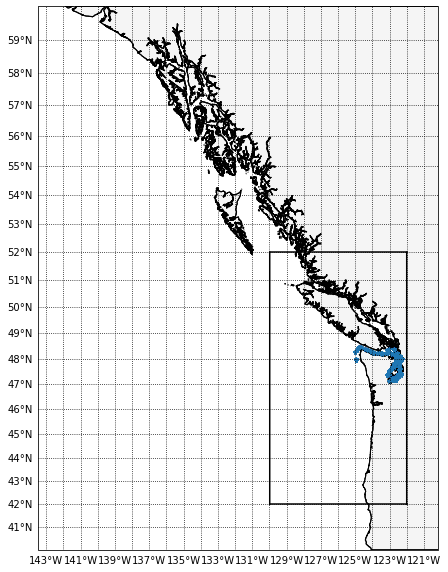

In [60]:
# Make plot area
xlim, ylim = [-143.5, -120.2], [40, 60]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', facecolor='whitesmoke', zorder=2))
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', zorder=4))

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs, zorder=8)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# Draw box
ax.plot(grid.lon_rho[:,0], grid.lat_rho[:,0], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[:,-1], grid.lat_rho[:,-1], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[-1,:], grid.lat_rho[-1,:], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[0,:], grid.lat_rho[0,:], 'k-', zorder=6, transform=crs.PlateCarree())

# add points  
ax.scatter(sncei['lon'], sncei['lat'], s=10, marker='*',transform=crs.PlateCarree(),zorder=7)

Text(0, 0.5, 'Monthly count')

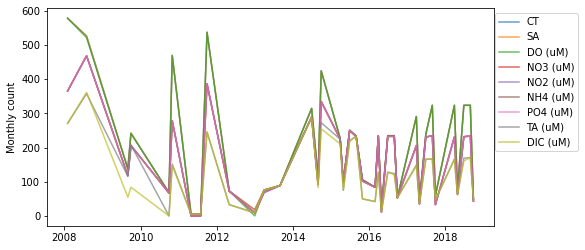

In [61]:
obs = sncei

obs['year_month'] = pd.to_datetime(obs.time).dt.to_period('M')  # This creates a Period object 'YYYY-MM'
obs['year_month'] = obs['year_month'].dt.to_timestamp()

# Columns to count non-NaN entries
columns_to_count = obs.columns.drop(['cid', 'cruise', 'time', 'lat', 'lon', 'name', 'z', 'year_month'])

# Group by 'year_month' and count non-NaN entries for each column
monthly_counts = obs.groupby('year_month')[columns_to_count].count()

# plot
fig, ax = plt.subplots(1,1,figsize=[8,4])

for var in monthly_counts.columns[:]:
    ax.plot(monthly_counts.index, monthly_counts[var], label=var,alpha=0.7)

# ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.2, 1.0))
ax.set_ylabel('Monthly count')

## NHL

In [45]:
# Initialize an empty list to store individual dataframes
dataframes = []
years = np.arange(1997,2021+1,1)

# Loop through the range of years
for year in years:
    # Construct the file path
    file_path = f'/data/rbeutel/obs/NHL/ctd/{year}.csv'
    
    # Read the pickled dataframe
    df = pd.read_csv(file_path)
    
    # Append the dataframe to the list
    dataframes.append(df)

# Concatenate all the dataframes in the list into a single dataframe
NHL = pd.concat(dataframes, ignore_index=True)

# drop -9999 values
NHL.replace(-9999, np.nan, inplace=True)

NHL 

,datetime,lat,lon,station_name,pressure (dbar),temperature (degC),salinity,DO (ml/L),cruise
0,1997-03-21 16:34:41,44.652,-124.10,1,1.0,10.4780,29.451,NaN,NH
1,1997-03-21 16:34:41,44.652,-124.10,1,2.0,10.4820,29.803,NaN,NH
2,1997-03-21 16:34:41,44.652,-124.10,1,3.0,10.4900,30.021,NaN,NH
3,1997-03-21 16:34:41,44.652,-124.10,1,4.0,10.5010,30.129,NaN,NH
4,1997-03-21 16:34:41,44.652,-124.10,1,5.0,10.4570,30.328,NaN,NH
...,...,...,...,...,...,...,...,...,...
830468,2021-07-08 00:33:00,44.652,-124.65,25,235.0,7.0631,34.005,1.4700,NH
830469,2021-07-08 00:33:00,44.652,-124.65,25,236.0,7.0601,34.005,1.4673,NH
830470,2021-07-08 00:33:00,44.652,-124.65,25,237.0,7.0579,34.005,1.4664,NH
830471,2021-07-08 00:33:00,44.652,-124.65,25,238.0,7.0558,34.005,1.4590,NH


/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


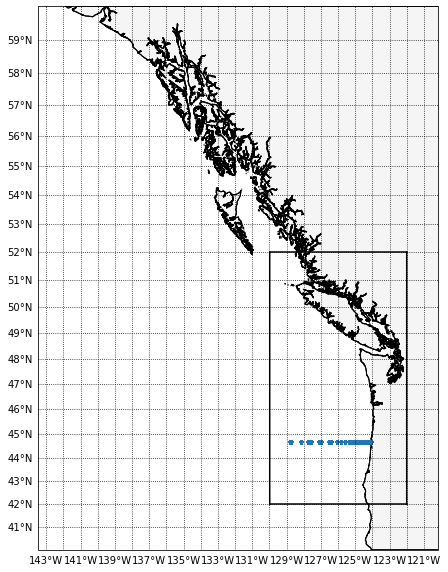

In [47]:
# Make plot area
xlim, ylim = [-143.5, -120.2], [40, 60]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', facecolor='whitesmoke', zorder=2))
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', zorder=4))

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs, zorder=8)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# Draw box
ax.plot(grid.lon_rho[:,0], grid.lat_rho[:,0], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[:,-1], grid.lat_rho[:,-1], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[-1,:], grid.lat_rho[-1,:], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[0,:], grid.lat_rho[0,:], 'k-', zorder=6, transform=crs.PlateCarree())

# add points  
ax.scatter(NHL['lon'], NHL['lat'], s=10, marker='*',transform=crs.PlateCarree(),zorder=7)

Text(0, 0.5, 'Monthly count')

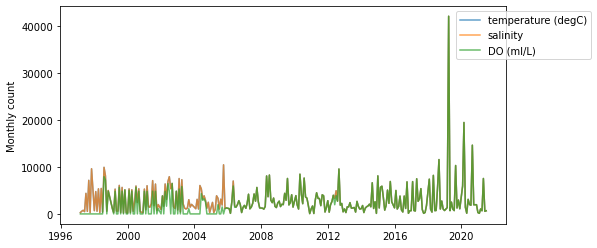

In [49]:
obs = NHL

obs['year_month'] = pd.to_datetime(obs.datetime).dt.to_period('M')  # This creates a Period object 'YYYY-MM'
obs['year_month'] = obs['year_month'].dt.to_timestamp()

# Columns to count non-NaN entries
columns_to_count = ['temperature (degC)','salinity','DO (ml/L)']

# Group by 'year_month' and count non-NaN entries for each column
monthly_counts = obs.groupby('year_month')[columns_to_count].count()

# plot
fig, ax = plt.subplots(1,1,figsize=[8,4])

for var in monthly_counts.columns[:]:
    ax.plot(monthly_counts.index, monthly_counts[var], label=var,alpha=0.7)

# ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.2, 1.0))
ax.set_ylabel('Monthly count')

## OCNMS CTD

In [65]:
# Initialize an empty list to store individual dataframes
dataframes = []
years = np.arange(2004,2023+1,1)

# Loop through the range of years
for year in years:
    # Construct the file path
    file_path = f'/data/rbeutel/obs/ocnms_ctd/ctd/{year}.p'
    
    # Read the pickled dataframe
    df = pd.read_pickle(file_path)
    
    # Append the dataframe to the list
    dataframes.append(df)

# Concatenate all the dataframes in the list into a single dataframe
ocnms = pd.concat(dataframes, ignore_index=True)

ocnms 

,cid,cruise,time,lat,lon,name,z,DO (uM),SA,CT
0,0,ocnms_ctd,2004-06-15 09:26:55.000000896,48.165798,-124.931900,Cape_Alava,-2.974763,NaN,31.866027,12.172963
1,0,ocnms_ctd,2004-06-15 09:26:55.000000896,48.165798,-124.931900,Cape_Alava,-3.966341,NaN,31.870213,12.144029
2,0,ocnms_ctd,2004-06-15 09:26:55.000000896,48.165798,-124.931900,Cape_Alava,-4.957914,NaN,31.893590,12.080860
3,0,ocnms_ctd,2004-06-15 09:26:55.000000896,48.165798,-124.931900,Cape_Alava,-5.949482,NaN,31.964294,12.001057
4,0,ocnms_ctd,2004-06-15 09:26:55.000000896,48.165798,-124.931900,Cape_Alava,-6.941046,NaN,32.078405,11.801925
...,...,...,...,...,...,...,...,...,...,...
46614,47,ocnms_ctd,2023-09-29 19:15:22.999998976,47.876202,-124.733398,TH042,-36.686691,247.917664,32.132268,14.038945
46615,47,ocnms_ctd,2023-09-29 19:15:22.999998976,47.876202,-124.733398,TH042,-37.678131,247.908737,32.133773,14.035959
46616,47,ocnms_ctd,2023-09-29 19:15:22.999998976,47.876202,-124.733398,TH042,-38.669567,247.578247,32.134074,14.034607
46617,47,ocnms_ctd,2023-09-29 19:15:22.999998976,47.876202,-124.733398,TH042,-39.660999,246.644836,32.134473,14.030843


/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


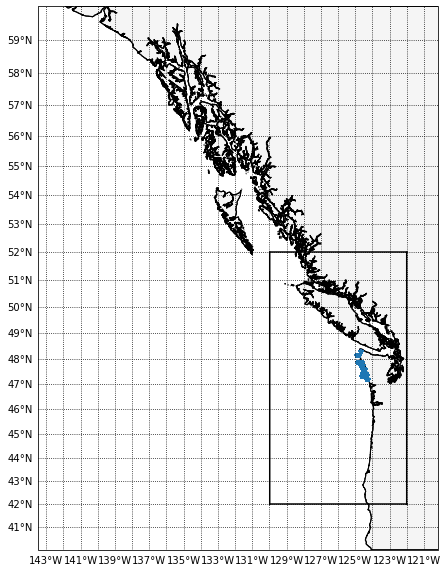

In [66]:
# Make plot area
xlim, ylim = [-143.5, -120.2], [40, 60]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', facecolor='whitesmoke', zorder=2))
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', zorder=4))

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs, zorder=8)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# Draw box
ax.plot(grid.lon_rho[:,0], grid.lat_rho[:,0], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[:,-1], grid.lat_rho[:,-1], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[-1,:], grid.lat_rho[-1,:], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid.lon_rho[0,:], grid.lat_rho[0,:], 'k-', zorder=6, transform=crs.PlateCarree())

# add points  
ax.scatter(ocnms['lon'], ocnms['lat'], s=10, marker='*',transform=crs.PlateCarree(),zorder=7)